In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [126]:
dataArray = [
    [0,0],
    [5, 7],
    [15,13],
    [20,20]
]
df = pd.DataFrame(dataArray,columns=['X','Y'])

In [127]:
df = df.assign(XxY= lambda x: x.X * x.Y)
df = df.assign(XxX= lambda x: x.X * x.X)
df = df.assign(YxY= lambda x: x.Y * x.Y)

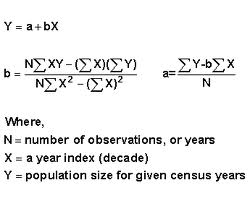

In [128]:
# Calculates slope (b)
def calcSlope(n_items,sum_of_x, sum_of_y, sum_of_xy, sum_of_x2):
    numerator = (n_items * sum_of_xy) - (sum_of_x * sum_of_y)
    denominator = (n_items*sum_of_x2) - (sum_of_x*sum_of_x)
    return numerator / denominator

# Calculates Y-intercept (a)
def calcIntercept(n_items,sum_of_x, sum_of_y, sum_of_xy, sum_of_x2):
    numerator = (sum_of_y * sum_of_x2) - (sum_of_x * sum_of_xy)
    denominator = (n_items*sum_of_x2) - (sum_of_x*sum_of_x)
    return numerator / denominator
# Linear regression (y` = a + bx) where y is regression value, a is intercept & b is slope
# regression = intercept + slope * x
def regression(x, slope, intercept):
    return intercept + (slope * x)

In [129]:
sum_of_x = df['X'].sum()
sum_of_y = df['Y'].sum()
sum_of_xy = df['XxY'].sum()
sum_of_x2 = df['XxX'].sum()
slope = calcSlope(len(df),sum_of_x,sum_of_y,sum_of_xy,sum_of_x2)
intercept = calcIntercept(len(df),sum_of_x,sum_of_y,sum_of_xy,sum_of_x2)
df = df.assign(RL= lambda x: regression(x.X,slope, intercept))

In [130]:
df

,X,Y,XxY,XxX,YxY,RL
0,0,0,0,0,0,0.8
1,5,7,35,25,49,5.4
2,15,13,195,225,169,14.6
3,20,20,400,400,400,19.2


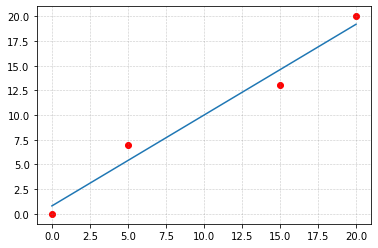

In [131]:
ax = plt.subplots()
plt.scatter(df.X, df.Y, c='red')
plt.plot(df.X, df.RL)
plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
plt.show()